In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_skills'>

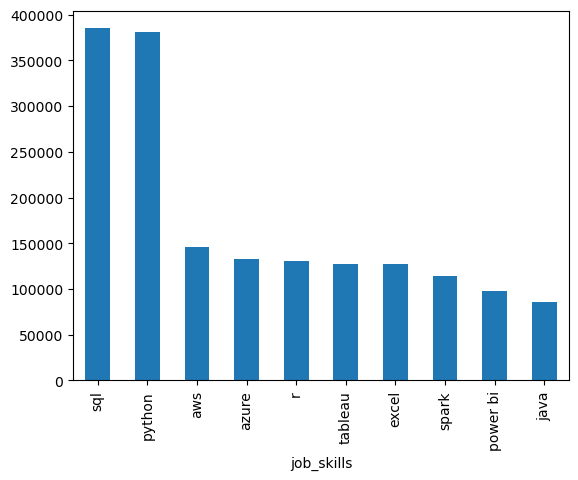

In [3]:
df_exploded = df.explode('job_skills')
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')

In [4]:
skill_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [5]:
df_skill_count = skill_count.reset_index(name='skill_count')
df_skill_count = df_skill_count.sort_values(by='skill_count',ascending=False)
df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


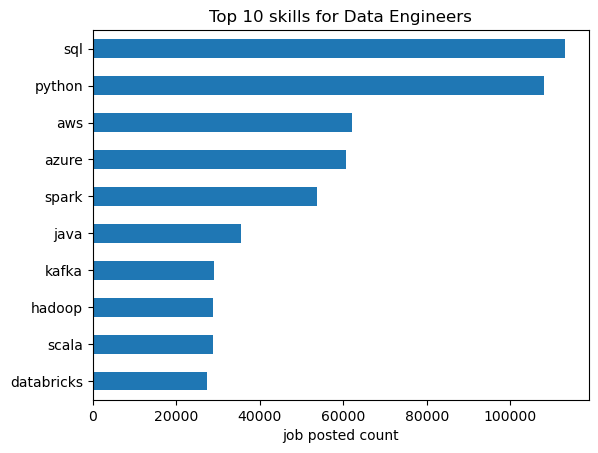

In [6]:
job_title = 'Data Engineer'
job_skills = 10

df_skill_final = df_skill_count[df_skill_count['job_title_short'] == job_title].head(job_skills)
df_skill_final.plot(kind='barh',x='job_skills',y='skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {job_skills} skills for {job_title}s')
plt.xlabel('job posted count')
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()

In [7]:
df['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [8]:
df['job_skills']

0                                                      None
1                [r, python, sql, nosql, power bi, tableau]
2         [python, sql, c#, azure, airflow, dax, docker,...
3         [python, c++, java, matlab, aws, tensorflow, k...
4         [bash, python, oracle, aws, ansible, puppet, j...
                                ...                        
785736    [bash, python, perl, linux, unix, kubernetes, ...
785737                               [sas, sas, sql, excel]
785738                                  [powerpoint, excel]
785739    [python, go, nosql, sql, mongo, shell, mysql, ...
785740                                          [aws, flow]
Name: job_skills, Length: 785741, dtype: object